In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Kaggle\Cardio_Fitness\CardioGoodFitness.csv")
df1 = df.copy()

In [3]:
df1.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,TM798,22,Male,14,Single,4,3,48658,106
6,TM195,21,Female,14,Partnered,3,3,35247,75
40,TM195,26,Male,16,Single,3,3,50028,85
119,TM498,32,Male,16,Partnered,3,3,53439,95
142,TM798,22,Male,18,Single,4,5,48556,200
105,TM498,25,Male,16,Partnered,2,3,50028,53
124,TM498,33,Female,18,Single,3,4,47754,74
21,TM195,23,Male,16,Single,4,3,40932,94
126,TM498,34,Male,16,Partnered,3,4,59124,85
90,TM498,23,Male,16,Partnered,4,3,45480,127


In [4]:
df1.columns.to_list()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

In [5]:
df1.shape

# Observation:There are 180 rows and 9 columns in the dataset

(180, 9)

In [6]:
df1.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
# categorical features -----------------> product, gender, Marital Status.
# continuous features ------------------> age, education, usage, fitness, income, miles.
# no missing values / duplicate values.

In [11]:
# converting object dtype to category for efficient memory usage.

lst1 = df1.select_dtypes('object').columns.to_list()

for item in lst1:
    df1[item] = df1[item].astype('category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [13]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [14]:
# Observation:

# Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
# Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
# Expected Treadmill usage is at least twice a week , maximum is 7 times a week and on Average 3 times a week
# Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
# Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
# Average self rated fitness is 3.

In [15]:
df1.describe(include='category')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [16]:
# Observation:

# TM195 is the most sold model.
# More Male customers are buying treadmill compared to female customer
# Customers who are Partnered are buying treadmill more compared to single customer.

# Univariate analysis

In [17]:
# function plots a combined graph for univariate analysis of continous variable 
# to check spread, central tendency , dispersion and outliers

def hist_box(data):
    Name = data.name.upper()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5))
    
    mean = data.mean()
    median = data.median()
    mode = data.mode().to_list()[0]
    
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize = 18, fontweight = 'bold')
    
    sns.boxplot(x = data, showmeans = True, orient = 'h', color = 'violet', ax = ax1)
    ax1.set(xlabel= '')
    
    sns.histplot(x = data, color = 'blue', ax = ax2)
    ax2.axvline(mean, color='r', linewidth=2, linestyle='--')
    ax2.axvline(median, color='g', linewidth=2, linestyle='-')
    ax2.axvline(mode, color='y', linewidth=2, linestyle='-')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

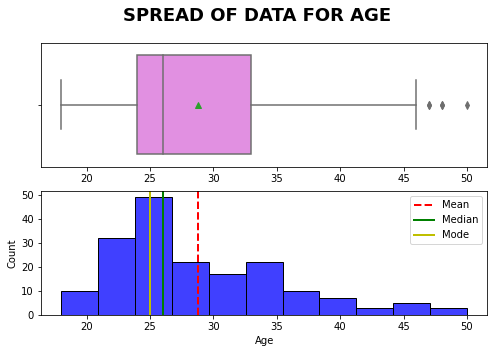

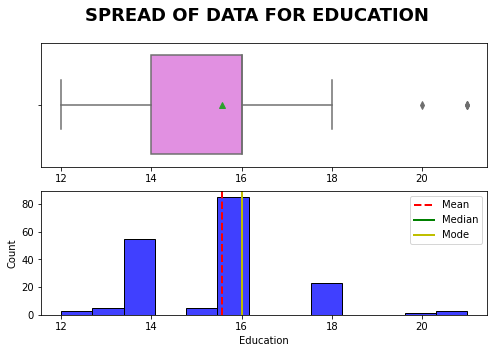

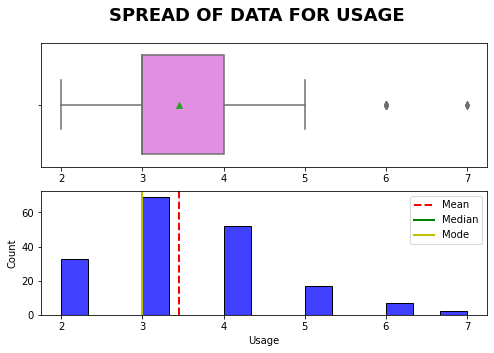

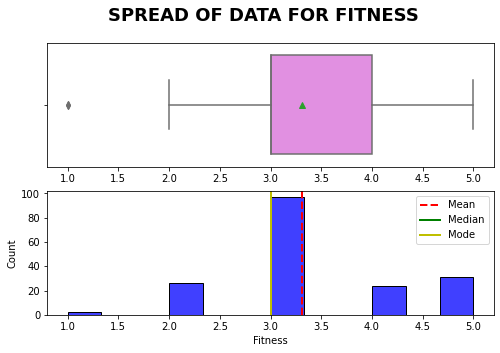

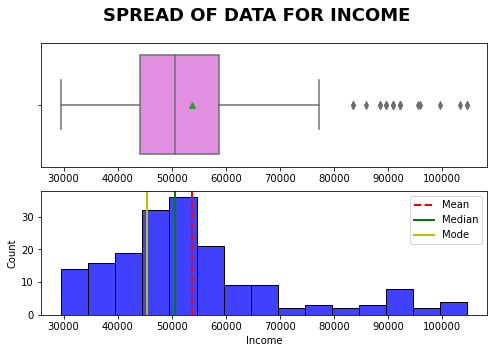

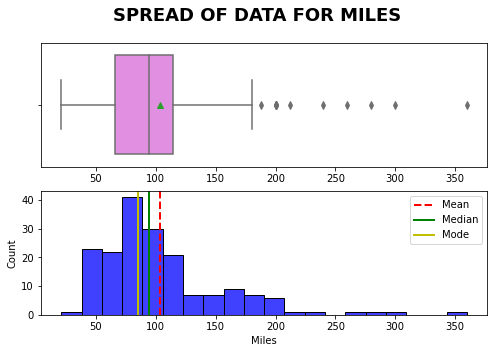

In [18]:
# univariate analysis of all quantitative features.

list_cols = df1.select_dtypes([np.number]).columns
for i in range(len(list_cols)):
    hist_box(df1[list_cols[i]])

In [19]:
# Observations:

# Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K.
# Most of the customers are in lower pay range and earn less than 70K.
# Income has some outliers. Few customers earn beyond 80K.
#####################################################################################
# Age is skewed towards right.
# Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25
# Customers buying treadmill after age of 40 and before 20 are very less.
#####################################################################################
# Miles is skewed towards right.
# Customers expect to run on an average 80 miles per week.
# There are some outliers, where customers are expecting to run more than 200 miles per weak.
#######################################################################################
# Most of the customers have self-rated their fitness as 3( average).
########################################################################################
# Most of the customers have 16 year of education (assuming them to be college graduates or bachelors).
# There are few outliers.
########################################################################################
# Most of customers expect they will be using the treadmill 3-4 days per week.
# There are few outliers where customer are expecting to use treadmill for 6 or 7 times a week.

In [20]:
# Function to create barplots that indicate percentage for each category.

def bar_perc(plot, feature):
    total = len(feature)                                          # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # width of the plot
        y = p.get_y() + p.get_height()                            # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12)              # annotate the percentage

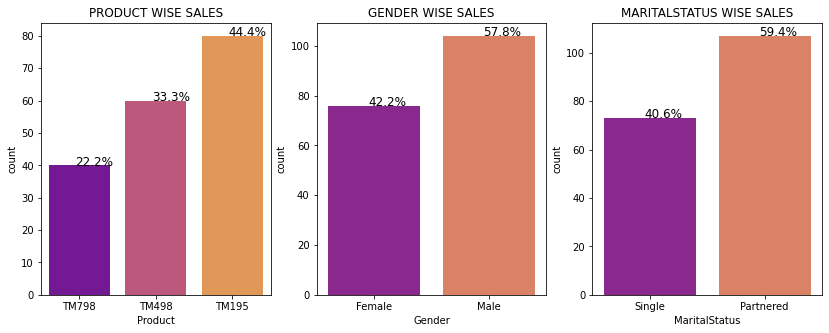

In [21]:
# get all category data type.

list_col=  df1.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df1[list_col[i]].value_counts(ascending=True).index                     # to display bar in ascending order
    sns.countplot(x=df1[list_col[i]], order=order,ax=axes1[i], palette='plasma').set(title=list_col[i].upper()+' WISE SALES')
    bar_perc(axes1[i],df1[list_col[i]])

In [22]:
# Observation:

# 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
# 57.8% male brought Treadmill.There are more Male customers than Female customers.
# 59.4% of the customers who purchased treadmill are Married.

# Bivariate and Multivariate Analysis

Text(0.5, 1.0, 'Product By Gender')

<Figure size 1080x720 with 0 Axes>

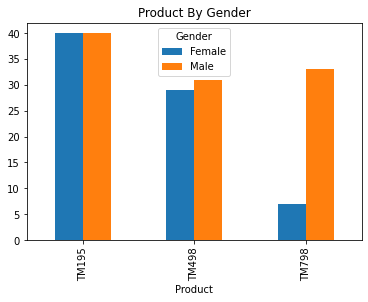

In [23]:
# category vs category features.
# product and gender

plt.figure(figsize=(15,10))
p1 = pd.crosstab(index=df1['Product'], columns=df1['Gender'])
p1.plot(kind='bar')
plt.title('Product By Gender')

In [24]:
# Observation

# TM195 model was equally bought my Male and Female
# Compared to females, male bought TM498 model .
# TM798 model is popular in Males than in female.

Text(0.5, 1.0, 'Product By MaritalStatus')

<Figure size 1080x720 with 0 Axes>

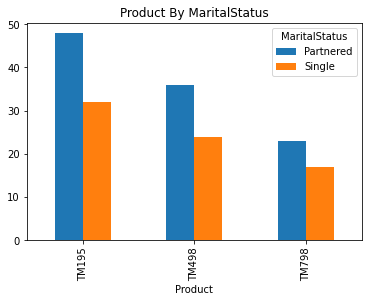

In [25]:
# product and marital status

plt.figure(figsize=(15,10))
p1 = pd.crosstab(index=df1['Product'], columns=df1['MaritalStatus'])
p1.plot(kind='bar')
plt.title('Product By MaritalStatus')

In [26]:
# Observation

# All 3 models were bought my Married couples more.
# TM195 has highest sales among single and partnered compared to other models.

<AxesSubplot:>

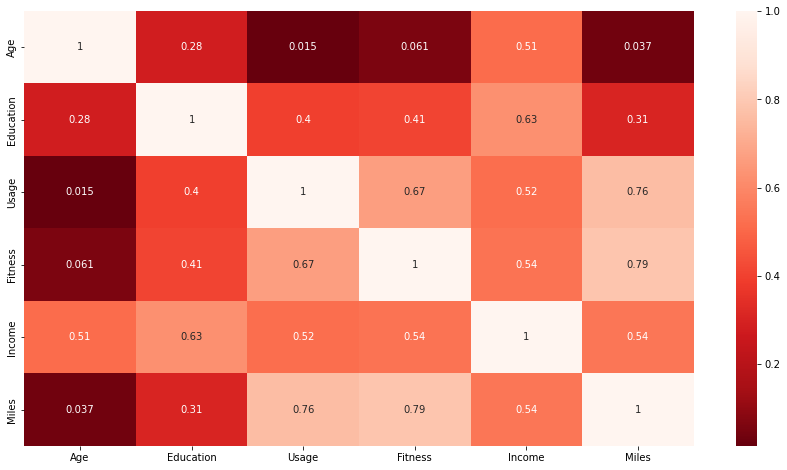

In [27]:
# continuos vs continuous features

corr = df1.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='Reds_r', annot=True)

In [28]:
# Observation

# Age and Income has some correlation
# Education and Income has some correlation
# There is some corelation between Usage and Income
# Fitness and miles are corelated
# Miles and usage are positively correlated

<Figure size 1080x504 with 0 Axes>

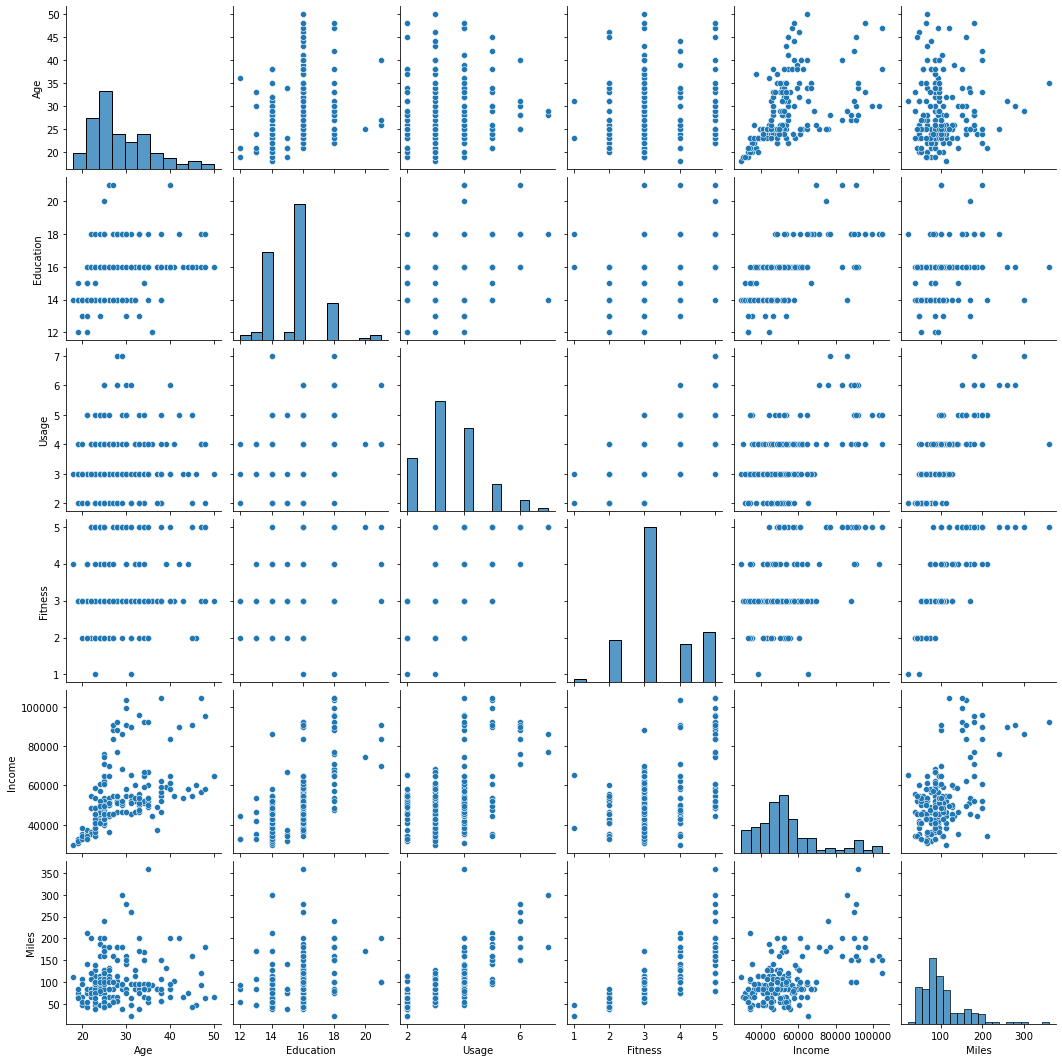

In [29]:
plt.figure(figsize=(15,7))
sns.pairplot(data=df1)
plt.show()

In [30]:
# Observation:-

# we get the same observation as from the correlation plot

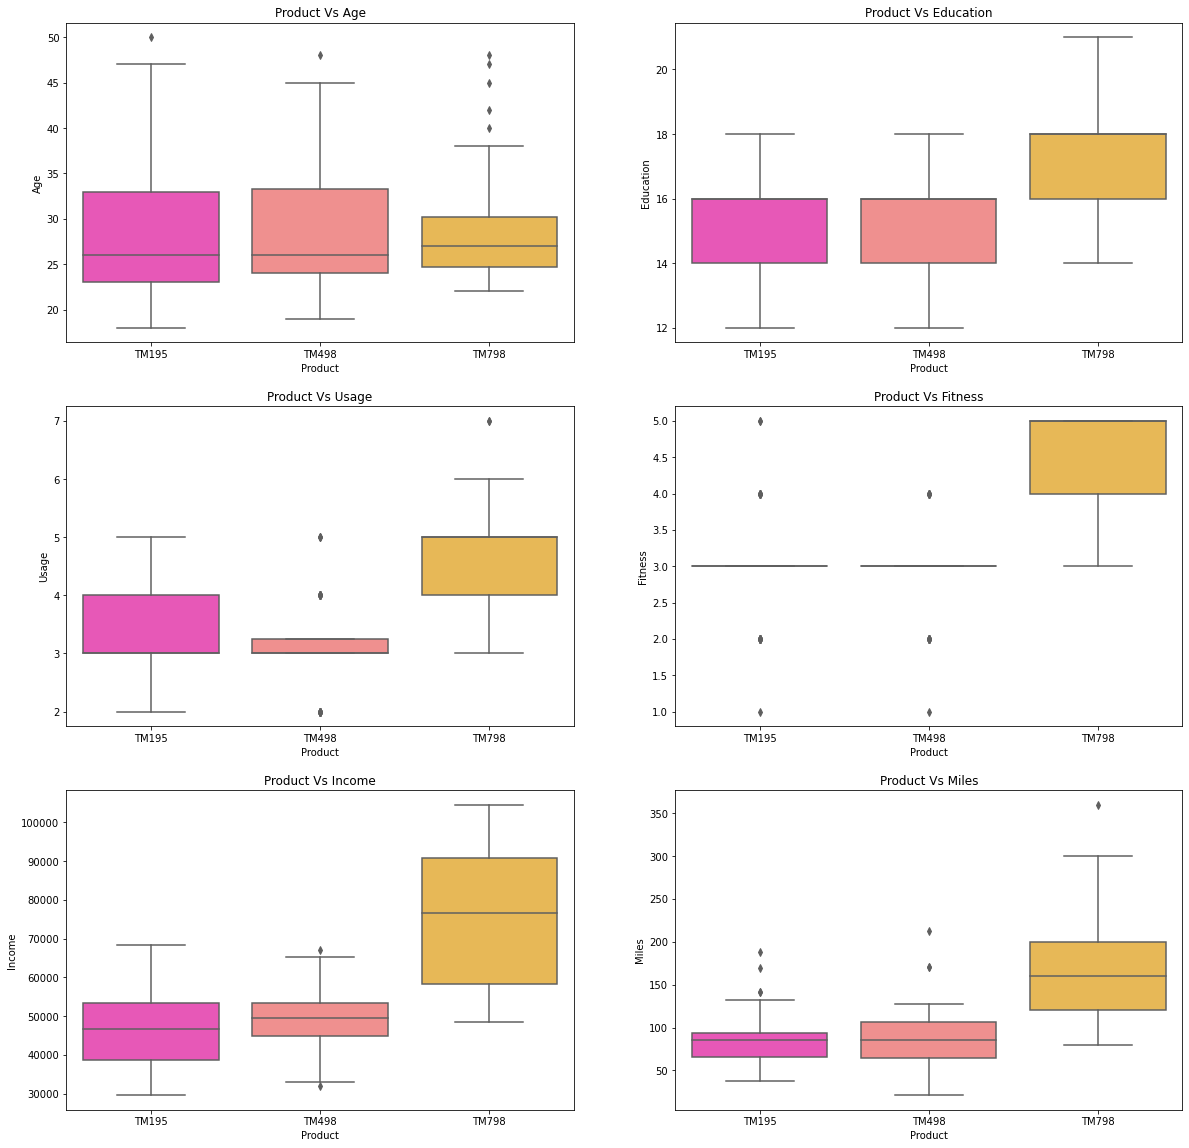

In [31]:
# Bi Varaite Analysis for 

#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles

fig1, axes1 = plt.subplots(3, 2, figsize=(20, 20))

list_col = df1.select_dtypes([np.number]).columns.to_list()

for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(x = df1['Product'], y = df1[list_col[i]], ax = ax, palette = 'spring', orient = 'v').set(title='Product Vs '+list_col[i])

In [32]:
# Observations:-

# There are many outliers for TM798 ,customers are more than age of 40 .
# Age of customers buying TM195 and TM498 is between 22-35, where as customers buying TM798 are primarily in 25-30.
# Customers with higher income and more education have purchased TM798 model.
# Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
# Customer with TM 195 expect to use treadmill 3-4 times a week and have average self rated fitness as 3 and some unfits.
# Customers who bought TM498 model expecting to use Treadmill less frequently but to run more miles a week.
# Customer buying TM798 plan to use it more frequently , run more miles and have high self rated fitness .
  # They seem to be more health conscious or professionals.

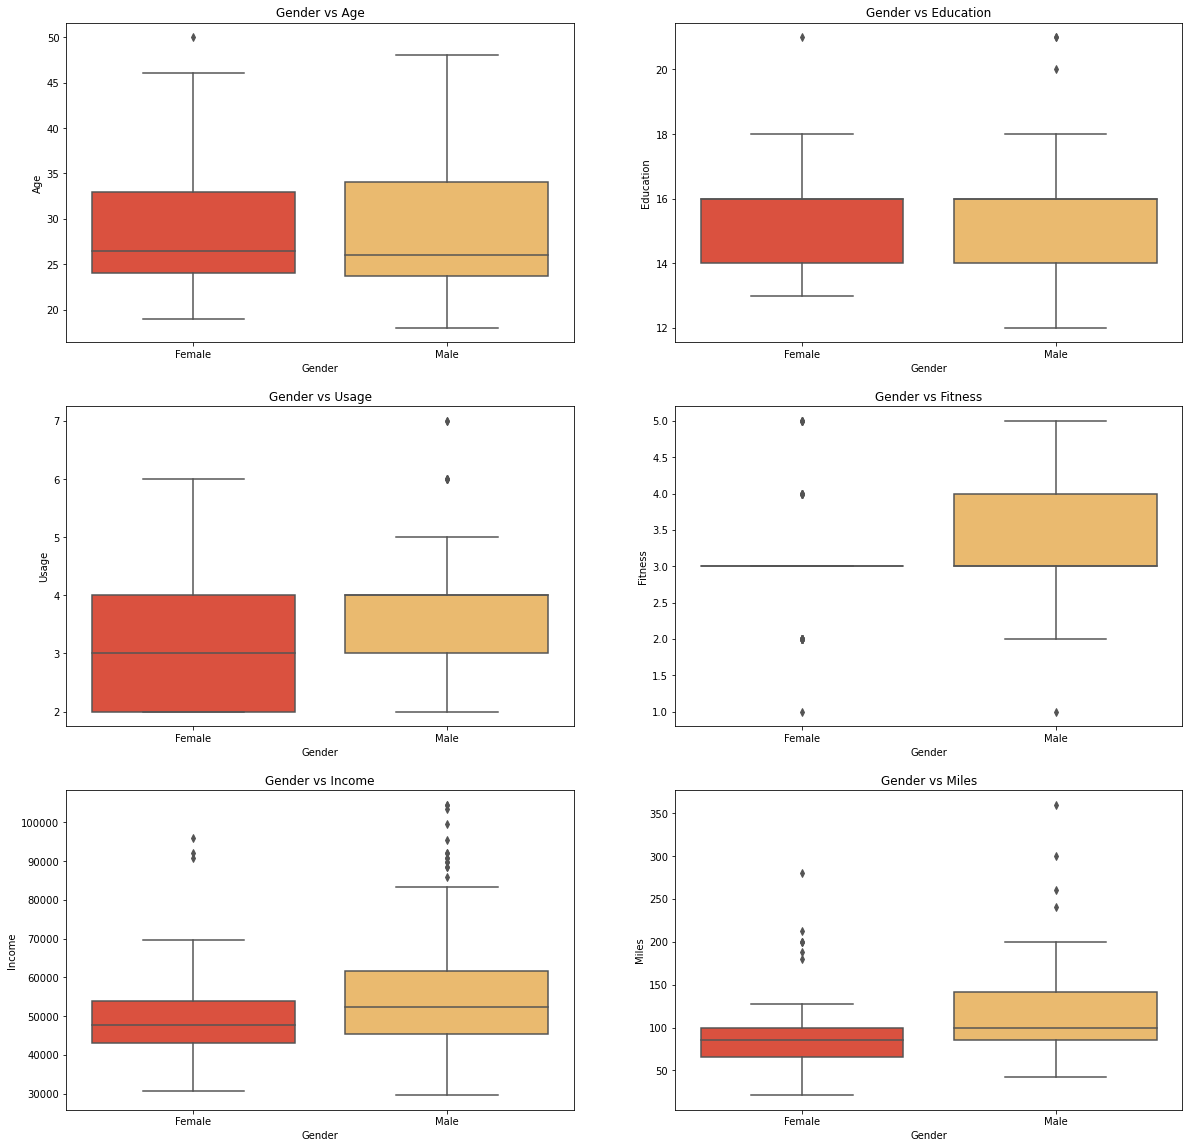

In [33]:
# Bi Varaite Analysis for 

#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 = plt.subplots(3, 2, figsize=(20,20))

for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(x=df1['Gender'], y=df1[list_col[i]], ax=ax, palette = 'YlOrRd_r', orient='v').set(title = 'Gender vs '+list_col[i])

In [34]:
# Observations:-

# Male customers earn more than Female customers and lots of outliers at upper end.
# Males Customer have higher self rated fitness than female.
# Expected Usage and miles covered on tread mill is less in Female customers than male customers.
# Males and Females of approx. similar age group 23-33 purchased the treadmill.
# Education of Male and Female customers is almost same.

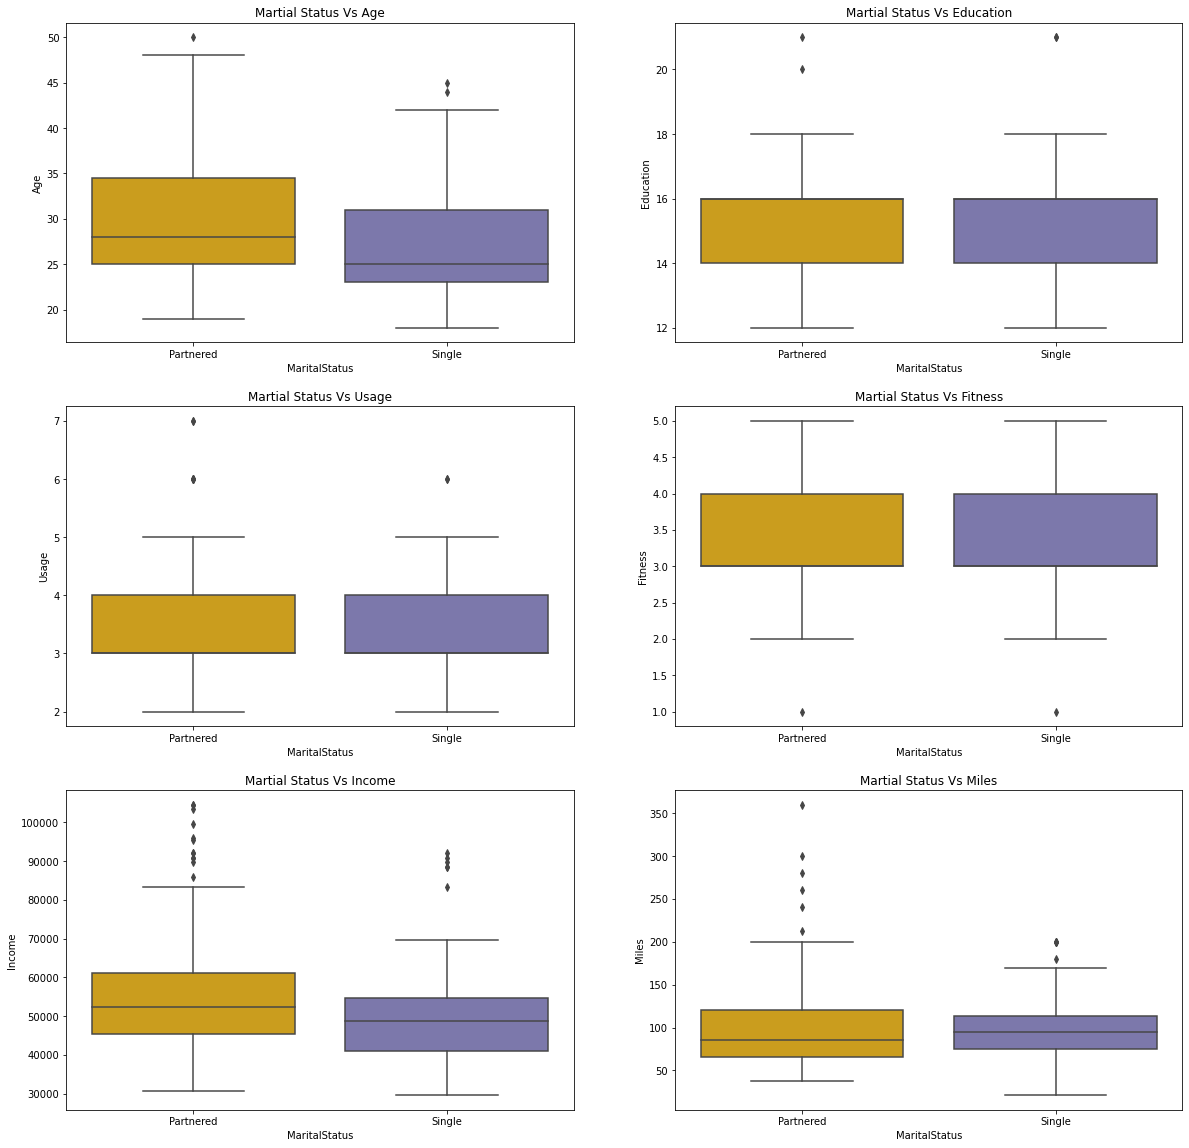

In [35]:
# Bi Varaite Analysis for 

#1.Martial Status & Age
#2.Martial Status & Income
#3.Martial Status & Education
#4.Martial Status & Usage
#5.Martial Status & Fitness
#6.Martial Status & Miles

fig1, axes1 = plt.subplots(3, 2, figsize=(20,20))

for i in range(len(list_col)):
    row = i//2
    col = i%2
    ax = axes1[row, col]
    sns.boxplot(x=df1['MaritalStatus'], y=df1[list_col[i]], ax=ax, orient = 'v', palette = 'Dark2_r').set(title = 'Martial Status Vs '+list_col[i])

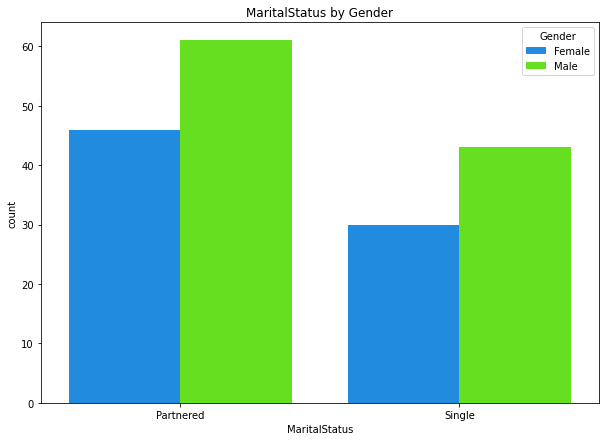

In [36]:
# categorical feature vs categorical feature

plt.figure(figsize=(10,7))
sns.countplot(x=df1['MaritalStatus'], hue=df1['Gender'], palette='gist_rainbow_r').set(title='MaritalStatus by Gender')
plt.show()

In [37]:
# Observations

# Partnered customer expects to run more miles compared to single
# Income of Partnered customer is more than income of single customer and have many outliers at upper end.
# Age of Partnered customer is more than Age of single customer.
# Self rated Fitness of both Partnered and Single customer are same.
# Education of both Partnered and Single customer is same.
# Usage of both Partnered and Single customer is same.
# Single and partnered males purchased more treadmills than females.

<Figure size 576x432 with 0 Axes>

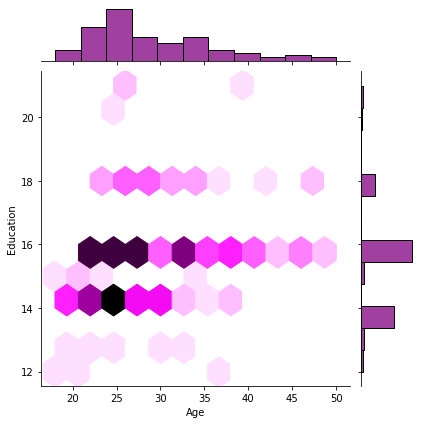

In [38]:
# Bivariate Analysis Age & Education

plt.figure(figsize=(8,6))
sns.jointplot(x=df1['Age'], y=df1['Education'], color='purple', kind='hex')
plt.show()

In [39]:
# Observation:-

# Customer between age 20-40 have 14 -16 years of education (college graduates or bachelors).

#  Multivariate Analysis

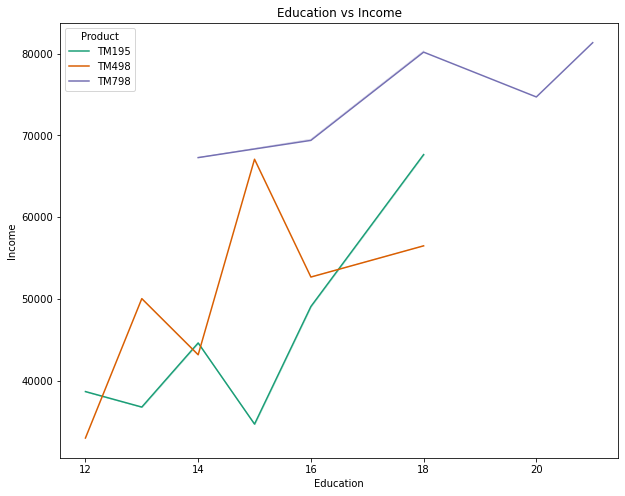

In [40]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df1['Education'], y=df1['Income'], hue=df1['Product'], palette='Dark2', ci=0).set(title='Education vs Income')
plt.show()

In [41]:
# Observation:-

# Education and Income are correlated.
# People with higher income and higher education prefer TM798.

<Figure size 720x576 with 0 Axes>

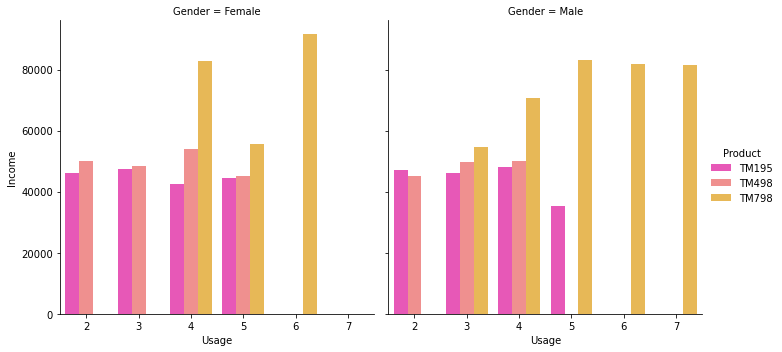

In [42]:
plt.figure(figsize=(10,8))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df1, palette='spring', ci=0)
plt.show()

In [43]:
# Observations

# Male customer with higher income ,prefer TM798 Model and expect to use treadmill 4-8 /week
# Customer who bought TM195 and TM498 are in same income range and expect to use treadmill 3-4 /week

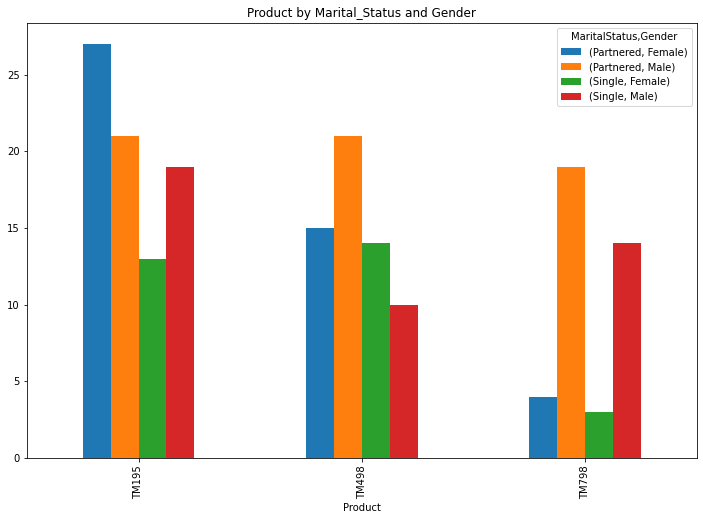

In [44]:
# product by marital status and gender.

p1 = pd.crosstab(index=df1['Product'], columns=[df1['MaritalStatus'], df1['Gender']])
p1.plot(kind='bar', figsize=(12,8)).set(title='Product by Marital_Status and Gender')
plt.show()

<Figure size 864x576 with 0 Axes>

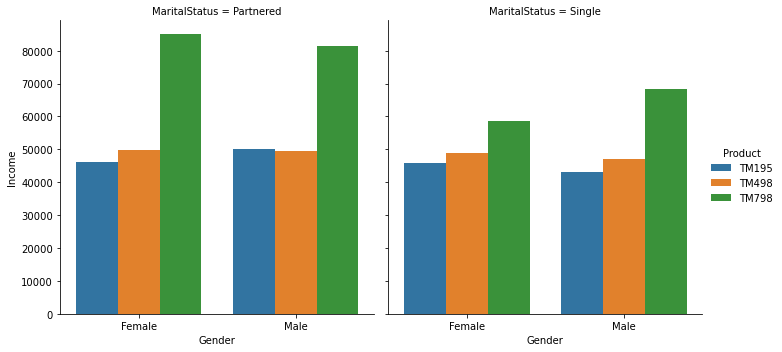

In [45]:
# Income by gender, product and marital status

plt.figure(figsize=(12,8))
sns.catplot(x='Gender', y='Income', hue='Product', col='MaritalStatus', kind='bar', data=df1, ci=0)
plt.show()

In [46]:
# Observations

# Partnered Female bought TM195 Model more compared to Partnered male.
# Single Female customers bought TM498 model more than Single male customers.
# Partnered Male customers bought TM798 model more than Single Male customers.
# There are more single males buying Treadmill than single Females.
# Single Male customers bought TM195 and TM798 Model compared to Single Female.
# Majority of people who buy the TM798 are man & partnered.
# The majority of our buyers are man.

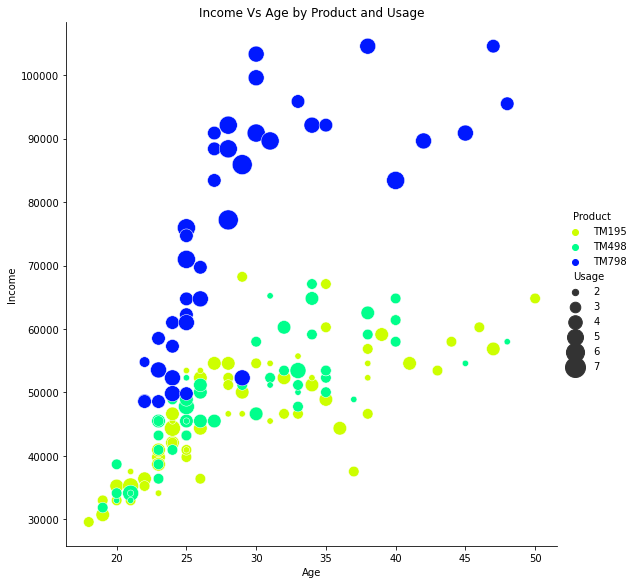

In [47]:
# income vs age by product and usage.

sns.relplot(x='Age', y='Income', hue='Product', size='Usage', data=df1, sizes=(40, 400), 
            height=8, palette='gist_rainbow').set(title='Income Vs Age by Product and Usage')
plt.show()

In [48]:
# Observations:

# Products TM195 and TM498 are bought by people with lower than 70K as income and age is concentrated more in range of 23-35
# Product TM798 is mainly bought by people with higher than 70K income and age falls in range of 23-32.
  # Majority of people who buys the TM798 expect that they will run more than consumers of the other two products, on average.

# Conclusion

In [ ]:
# Impt. Observations:

# 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
# 57.8% male brought Treadmill. There are more Male customers than Female customers.
# 59.4% of the customers who purchased treadmill are partnered.
# Average Usage of Males is more than Average usage of Females.
# Customers buying treadmill are younger and average age of customer is 28, median is 26 and mode is 25
# Most of the customers are in lower pay range and earn less than 70K.
# Average Education is 16 and median is 18.

# Customer Profiles of Models

In [50]:
df1[df1['Product']=='TM195'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [51]:
df1[df1['Product']=='TM498'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [52]:
df1[df1['Product']=='TM798'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [ ]:
# TM195

# 44.4% customers brought TM195. Making it most popular model.
# Average customer income is 46K
# Customers who bought this treadmill have income less than 60k with an average of 55K.
# There are same numbers of Male and Female customers
# Average age of customer who purchases TM195 is 28.5, Median is 26.
# Average years of Education of customers is 15, and median is 16 assuming it to be bachelors.
# Self rate fitness level of customer is 3 on an average.
# They expect to use treadmill 3-4 times a week.

# Our 44.4% sale has come from this model. Majority of people whose income is around 55K has purchased this model 
# assuming it’s because of its appealing price and affordability. Equal amount of males and females bought this model 
# suggesting this model is not gender specfic. Majority of the customers who purchased this model are Partnered Females 
# and Single Males compared to Single females and Partnered male. This may be cause of the features this treadmill 
# provides and the cost of treadmill. Customers who bought this treadmill believe there fitness is average, and 
# might be looking for a basic treadmill that does the job.

In [ ]:
# TM498

# This Model is sold more than TM798 model
# Average Income of the customer is 48,973
# Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
# Average age of customer who purchases TM498 is 28.9 , Median is 26 . Customer range is between 24-35.
# Average years of Education of customers is 16 assuming it to be bachelor's

# Sale was 33%.This was the 2nd most sold model. The income of this group is almost same as TM195 model. 
# TM498 model expecting to use Treadmill less frequently but to run more miles a week.
# Single Female customers bought TM498 model more than Single male customers, may be cause of some feature difference.

In [ ]:
# TM798

# Average age of customer who purchases TM798 is 29 , Median is 27 . There are some outliers , 
  # suggesting we need explore more closely customers who are above 40 for any possibility of new customers.
# Average Education is 17 and median is 18, suggest they have some advanced education
# Expected usage is 4-5 day a week
# Expected Miles to run is on an Average 166 miles per week and median is 160.
# Average Income is 75K and median is 76K
# Product made only 22 % of sales.

# This treadmill seems to be more popular with customer having high income and Partnered Male customer .
# This may be more costlier compared to other two models. Treadmill may have some advanced features and people 
# with high income are ready to spend more money to buy this model.Male customers who are more serious about fitness 
# or Professionals buy this model.Customer's self rated fitness is approx. 5 and expected usage is more than 4 days, 
# suggest they have been working out and might be looking for a upgrade from there existing treadmill model.

In [ ]:
# Recommendations:
    
# TM195 & TM498 attracts people with income less than 60k , may be because of cost of both models. We should market 
# these models as a budget Treadmill for all.

# TM798 should be marketed as a high end Treadmill for professionals and athletes. Create a luxiurous brand image 
# for this Treadmill.

# Assuming TM 798 provides high margin of profit, we should brand it as Treadmill for athletes. 
# We can also endorse some athlete to promote this Treadmill. This might increase the sales.

# Considering above observations, We can attract customers to upgrade from their existing treadmill and switch to TM798 ,
# highlighting extra features this Treadmill provides.

# To expand our sales with Female customers, We could run a marketing campaign during Women's days, 
# Mothers days emphasizing on fitness and exercise.

# The age of our customers are in the range of 20 years old to 35 years old. We need to research if 
# there is any scope to increase sale with customers who are more than 35 years old.